In [2]:
import tensorflow as tf
import tensorflow.contrib.keras.api.keras as K
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.contrib.keras.api.keras.datasets import mnist


Instructions for updating:
Use the retry module or similar alternatives.


In [4]:
# Step 1: Load dataset

(x_train, _), (x_test, _) = mnist.load_data()

H = 28
W = 28
C = 1

# convert to float32, with pixel values in the range [0-1]
x_train = x_train.reshape([x_train.shape[0], H, W, C]).astype(np.float32)
x_test = x_test.reshape([x_test.shape[0], H, W, C]).astype(np.float32)

x_train = x_train/255.0
x_test = x_test/255.0

# copy data and add gaussian noise, sigma=0.2
x_train_noisy = np.copy(x_train) + np.random.normal(scale = 0.2, size = x_train.shape)
x_test_noisy = np.copy(x_test) + np.random.normal(scale = 0.2, size = x_test.shape)

(10000, 28, 28, 1)


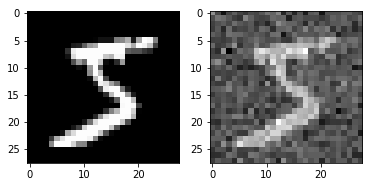

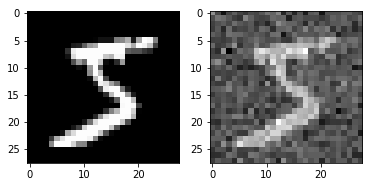

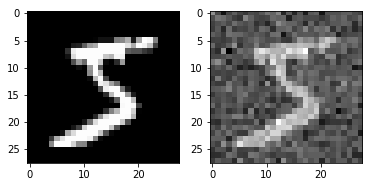

In [7]:
# visualise noiseless/noisy pair

idx = 0

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(x_train[idx, :, :, 0], cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(x_train_noisy[idx, :, :, 0], cmap='gray')

plt.show()

In [8]:
# Step 2: Build a denoising autoencoder

model = K.models.Sequential()

model = K.models.Sequential()

model.add(K.layers.Conv2D(input_shape = (x_train.shape[1:]), filters = 32, kernel_size = 3, padding = 'same', 
                          activation='relu'))

model.add(K.layers.MaxPooling2D(pool_size=2))

model.add(K.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))

model.add(K.layers.MaxPooling2D(pool_size=2))

model.add(K.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))

model.add(K.layers.UpSampling2D(size=(4, 4)))

model.add(K.layers.Conv2D(filters = 1, kernel_size = 3, padding = 'same', activation = 'sigmoid'))

# Compile the model with 'binary_crossentropy' loss function and 'Adagrad' optimizer
model.compile(optimizer='Adagrad', loss='binary_crossentropy')

In [10]:
# Step 3: Train the model

model.fit(x_train_noisy, x_train, epochs=5, batch_size=100, shuffle=True, validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 128s 2ms/step - loss: 0.1096 - val_loss: 0.1065
Epoch 2/5
60000/60000 [==============================] - 124s 2ms/step - loss: 0.1062 - val_loss: 0.1041
Epoch 3/5
60000/60000 [==============================] - 129s 2ms/step - loss: 0.1045 - val_loss: 0.1031
Epoch 4/5
60000/60000 [==============================] - 130s 2ms/step - loss: 0.1034 - val_loss: 0.1020
Epoch 5/5
60000/60000 [==============================] - 130s 2ms/step - loss: 0.1026 - val_loss: 0.1013


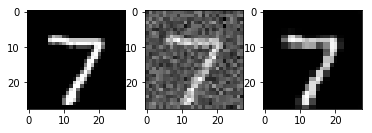

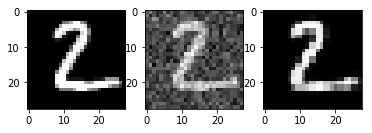

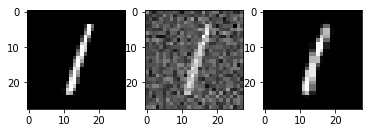

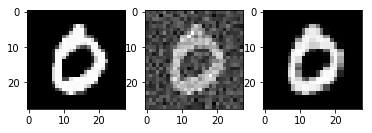

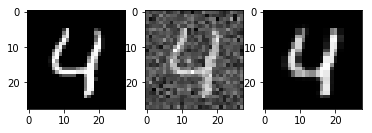

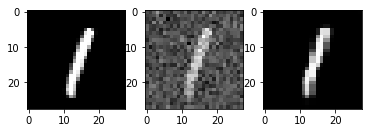

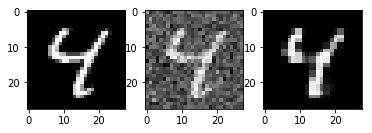

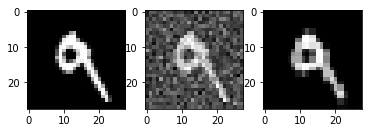

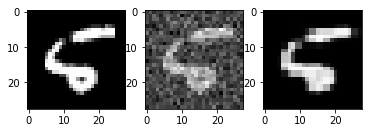

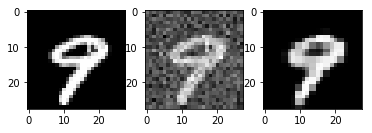

In [11]:
# Step 4: Evaluate the model

y_test = model.predict(x_test_noisy)

for idx in range(10):
    plt.subplot(1, 3, 1)
    plt.imshow(np.squeeze(x_test[idx, :, :, :]), cmap='gray')

    plt.subplot(1, 3, 2)
    plt.imshow(np.squeeze(x_test_noisy[idx, :, :, :]), cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.imshow(np.squeeze(y_test[idx, :, :, :]), cmap='gray')
    plt.show()